In [1]:

import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np





## CNNs for CIFAR10

* https://rcalix1.github.io/DeepLearningAlgorithms/SecondEdition/chapter6_CNNs/index.html

## Load and save torch model checkpoints

* https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Data

* Data: https://github.com/YoongiKim/CIFAR-10-images/tree/master


In [2]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [4]:

## !pip install torchvision


In [5]:

torch.cuda.is_available()


True

In [6]:

torch.cuda.device_count()


1

In [7]:

torch.cuda.current_device()


0

In [8]:

torch.cuda.get_device_name(0)


'NVIDIA A30'


## Assign device


In [9]:

torch_device = torch.device("cpu")

if torch.cuda.is_available(): 
    torch_device = torch.device("cuda")


In [10]:

torch_device


device(type='cuda')


## CIFAR10 DATA


In [11]:

raw_data_train = '/home/rcalix/Desktop/CIFAR-10-images-master/train/'

raw_data_test  = '/home/rcalix/Desktop/CIFAR-10-images-master/test/'



## PATH to checkpoint


In [12]:

PATH = "/scratch/scholar/rcalix/CNN_model_CIFAR10"



## Train data


In [13]:

dataset_train = []
labels_train  = []
targets_train = []


In [14]:

for folder in os.listdir( raw_data_train ):
    ## print(folder)
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        if folder not in labels_train:
            labels_train.append( folder )
        targets_train.append(  labels_train.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_train.append(img)
        
      


In [15]:

len(labels_train)


10

In [16]:

len( targets_train )


50000

In [17]:

dataset_train[3].shape


torch.Size([3, 32, 32])

In [18]:

data_train    = torch.stack( dataset_train )
targets_train = torch.Tensor(  targets_train  ).type(   torch.LongTensor   )

torch.save(   (data_train, targets_train, labels_train), "InClass_CIFAR10_data"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [19]:

data_train.shape


torch.Size([50000, 3, 32, 32])

In [20]:

targets_train.shape


torch.Size([50000])

In [21]:

data_train[4].shape


torch.Size([3, 32, 32])

In [22]:

targets_train[24000:25000]


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


## Print images


In [23]:

img_tr = data_train[46000]
img_tr


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0235, 0.0196],
         [0.0000, 0.0039, 0.0078,  ..., 0.0196, 0.0118, 0.0118],
         [0.0157, 0.0039, 0.0000,  ..., 0.0078, 0.0039, 0.0196],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0314, 0.0353],
         [0.0353, 0.0275, 0.0000,  ..., 0.0118, 0.0157, 0.0157],
         [0.0000, 0.0235, 0.0000,  ..., 0.0157, 0.0235, 0.0275]],

        [[0.0078, 0.0078, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0157, 0.0196,  ..., 0.0118, 0.0000, 0.0000],
         [0.0157, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0196],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0157, 0.0118],
         [0.0353, 0.0275, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0235, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0000,  ..., 0.0157, 0.0039, 0.

In [24]:

transform = T.ToPILImage()



In [25]:

img = transform(  img_tr  )


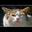

In [26]:

img



## Class balance


In [27]:

y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

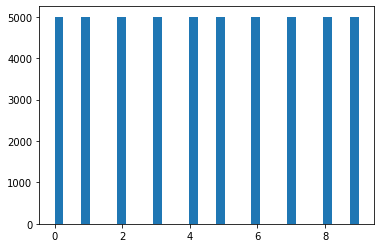

In [28]:

_ = plt.hist( targets_train.numpy() , bins="auto" )
plt.show()



## Test Data


In [29]:

dataset_test = []
labels_test = []
targets_test = []


In [30]:

for folder in os.listdir( raw_data_test ):
    ## print(folder)
    for image in os.listdir( os.path.join(raw_data_test, folder) ):
        if folder not in labels_test:
            labels_test.append( folder )
        targets_test.append(  labels_test.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_test.append(img)


In [31]:

data_test   = torch.stack( dataset_test )
targets_test = torch.Tensor(  targets_test  ).type(   torch.LongTensor   )

torch.save(   (data_test, targets_test, labels_test), "InClass_CIFAR10_data_test"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [32]:

data_test.shape


torch.Size([10000, 3, 32, 32])

In [33]:

targets_test.shape


torch.Size([10000])

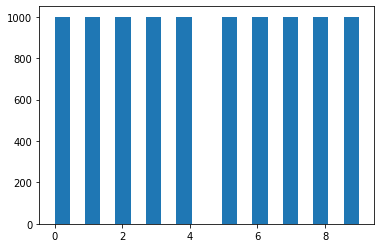

In [34]:

_ = plt.hist( targets_test.numpy() , bins="auto" )
plt.show()


In [35]:

X_train = data_train  
y_train = targets_train


In [36]:

X_test = data_test  
y_test = targets_test 



## Change to float 32


In [37]:

X_train = X_train.numpy()
X_test  = X_test.numpy()


In [38]:

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )


In [39]:

X_train = torch.from_numpy(X_train )
X_test = torch.from_numpy( X_test  )



## Print shapes


In [40]:

X_train.shape[0]


50000

In [44]:

y_train[30000].item()
type(y_train[30000].item())


int

In [45]:

y_train[30000].item()


6

In [46]:

 X_train[78]


tensor([[[0.4510, 0.4510, 0.4431,  ..., 0.2549, 0.3333, 0.3529],
         [0.4863, 0.4980, 0.4941,  ..., 0.2863, 0.3608, 0.3608],
         [0.4353, 0.4588, 0.4706,  ..., 0.3098, 0.3608, 0.3255],
         ...,
         [0.4510, 0.4627, 0.4549,  ..., 0.4706, 0.4510, 0.4353],
         [0.4392, 0.4549, 0.4510,  ..., 0.4667, 0.4549, 0.4431],
         [0.4157, 0.4471, 0.4588,  ..., 0.4431, 0.4392, 0.4353]],

        [[0.5294, 0.5255, 0.5176,  ..., 0.2980, 0.3843, 0.4039],
         [0.5569, 0.5725, 0.5686,  ..., 0.3294, 0.4118, 0.4118],
         [0.5059, 0.5333, 0.5333,  ..., 0.3529, 0.4039, 0.3765],
         ...,
         [0.4627, 0.4745, 0.4745,  ..., 0.4824, 0.4784, 0.4627],
         [0.4588, 0.4745, 0.4706,  ..., 0.4784, 0.4784, 0.4784],
         [0.4353, 0.4667, 0.4784,  ..., 0.4667, 0.4627, 0.4667]],

        [[0.5255, 0.5176, 0.5098,  ..., 0.2314, 0.3059, 0.3255],
         [0.5569, 0.5647, 0.5608,  ..., 0.2627, 0.3412, 0.3412],
         [0.5059, 0.5255, 0.5294,  ..., 0.2863, 0.3373, 0.

In [47]:

 CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]


In [48]:

 CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]



## DataLoader


In [49]:

batch_size = 16


In [50]:

train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )


In [51]:

test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )



## Architectures


In [52]:

32*32*3


3072

In [74]:

class DL_3h_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 , 200)
        self.act1    = nn.ReLU()
        
        self.linear2 = nn.Linear(200 , 100)
        self.act2   = nn.ReLU()
        
        self.linear3 = nn.Linear( 100 ,50)
        self.act3    = nn.ReLU()
        
        self.linear4 = nn.Linear(50 , 10)
        self.act4    = nn.Softmax(dim=1)
        
        ## self.norm    = nn.LayerNorm()
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        x            = self.act2(x)
        x            = self.linear3(x)
        x            = self.act3(x)
      
        x            = self.linear4(x)
        y_pred       = self.act4(x)
        
        return y_pred


In [88]:

class CNN_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
              
            ## FeedForward
            
            nn.Flatten(),
            nn.Linear( 128 , 512),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(512, 10),
            nn.Softmax(dim=1)        ## nn.LogSoftmax()
            
        
        )
        
    ## perform inference
    def forward(self, x):
        
        y_pred = self.model( x  )
       
        
        return y_pred



In [89]:

class MLP_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 ,20)
        self.act1    = nn.LeakyReLU()
        self.linear2 = nn.Linear(20 , 10)
        self.act2    = nn.Softmax(dim=1)
        
        self.norm    = nn.LayerNorm()
        self.dropout = nn.Dropout(0.2)
        
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.norm(x)
        x            = self.dropout(x)
        
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred


In [90]:

def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            ## xb = xb.view(  (16, -1 ) )
            
            xb = xb.to( torch_device )
            yb = yb.to( torch_device )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)
            new_PATH = PATH + str(epoch)
            print( new_PATH )
            torch.save(model, new_PATH)


In [91]:

## torch.save(model, PATH)





## Core functions


In [92]:

N_Epochs      = 60
learning_rate = 0.001


In [93]:

## model = MLP_net()
## model =  DL_3h_net()

model = CNN_net()

model.to( torch_device )

opt = torch.optim.Adam(  model.parameters(), lr=learning_rate  )

loss_fn = nn.CrossEntropyLoss()


In [94]:



training_loop( N_Epochs, model, loss_fn, opt )


0 loss= tensor(2.0991, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR100
5 loss= tensor(2.2257, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR105
10 loss= tensor(1.9590, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1010
15 loss= tensor(1.9612, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1015
20 loss= tensor(2.0249, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1020
25 loss= tensor(2.0859, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1025
30 loss= tensor(2.1487, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1030
35 loss= tensor(1.8987, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1035
40 loss= tensor(1.9612, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_mod

In [95]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [96]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        x_real = x_real.to( torch_device )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function( y_real, preds.cpu() )
   


Accuracy: 0.16
Confusion Matrix:
[[347  84  19  22  38  37  38  89  34 292]
 [ 24   5  40 121 674  69   5  17  10  35]
 [  2  13   8 719  59 168  10   5   4  12]
 [111 553  24  35  24  65  14  39  35 100]
 [ 50 178  32  50  37  16  58 133 307 139]
 [ 19  33   4 212  86 586  18   8   4  30]
 [ 94  59  75  45  40  27  71 319 110 160]
 [ 38  44   8  47  24  49 451  56 107 176]
 [ 21  23 315 120 293  77  22  76  16  37]
 [125  74  31  57  45  56  56  74  34 448]]
Precision: 0.150
Recall: 0.161
F1-measure: 0.153



## From checkpoint


In [ ]:

# Model class must be defined somewhere
model2 = torch.load('/scratch/scholar/rcalix/CNN_model_CIFAR1010')
## model.eval()



In [ ]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        y_pred = model2(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)


In [ ]:

rc = data_train[4].view((-1))
rc.shape


In [ ]:

rc = torch.unsqueeze(rc, dim=0)
rc.shape


In [ ]:

## example_label = model( rc )


In [ ]:

## example_label



## Figure out the dimensions of CNN


In [84]:

N_batches_rc = 16


In [86]:
'''

model_rc = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
              
            ## FeedForward
            
            nn.Flatten()
            
            
        
        )
        
'''


model_rc  = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 3
            nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
              
            ## FeedForward
            
            nn.Flatten()
)


In [87]:

my_tensor_test   = torch.randn(N_batches_rc, 3, 32,  32)

res_actual_model = model_rc(  my_tensor_test   )

res_actual_model.shape


torch.Size([16, 128])